# Census Income

Problem Statement:
    
In this project, we are going to predict whether a person make over 50 dollar or below 50 dollar a year.

In [1]:
#Importing Necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the dataset

df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [3]:
#Checking random 5 rows of the dataset

df.sample(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
27709,52,Private,317032,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,>50K
9659,37,Local-gov,365430,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,Canada,>50K
9337,27,Private,236246,Assoc-acdm,12,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
17554,30,Private,169589,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K
11524,43,Private,115806,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,2547,40,United-States,>50K


# Exploratory Data Analysis (EDA)

In [4]:
#Checking the shape of the dataset

df.shape

(32560, 15)

There are a total of 32560 rows and 15 columns, of which "Income" is the target variable.

In [5]:
#Checking the Info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


From the above result, we can conclude that there are zero null values present in the dataset. 

In [6]:
#Checking the null-values in the dataset

df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<Axes: >

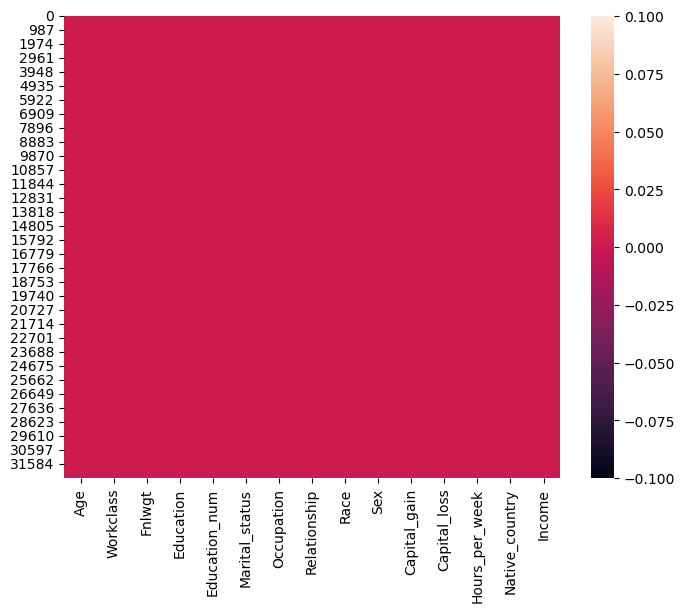

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull())

In [8]:
#Checking the columns of the dataset

df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [9]:
#checking the number of unique values in each column of the dataset

df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [10]:
#Checking the value counts of each column of the dataset

for i in df.columns:
    print(df[i].value_counts())
    print('\n')
    print('*'*50)
    print('\n')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


**************************************************


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


**************************************************


164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


**************************************************


 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 

In [11]:
#Let's divide the dataset into categorical and numerical columns on the basis of the data type

categorical_col=[]
for i in df.dtypes.index:
    if df[i].dtypes==object:
        categorical_col.append(i)
        
print("Categorical Columns present in the dataset: ", categorical_col)
print('\n')
print('*'*100)
print('\n')

numerical_col=[]
for i in df.dtypes.index:
    if df[i].dtypes!=object:
        numerical_col.append(i)
        
print("Numerical Columns present in the dataset: ", numerical_col)

Categorical Columns present in the dataset:  ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


****************************************************************************************************


Numerical Columns present in the dataset:  ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


In [12]:
#Checking the statistical information of the numerical columns in the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


From the above result, we can conclude the following:
    
1. For the age column, the mean is slightly greater than the median, the distribution will be rightly skewed in this column.

2. For the Education_num and Hours_per_week columns, the mean and median are almost equal, so the data will be normally distributed in these columns.

3. For capital gain and capital loss, the mean is very much higher than the median, so the data will be rightly skewed.

4. For the Fnlwgt column, the mean is greater than the median, so the distribution will be right-skewed in this column as well.

5. We can see a large difference between the 75th percentile and the maximum values, which indicates the presence of outliers in the dataset.

# Data Visualisation

Univariate and Bivariate Analysis

In [13]:
sns.set()

In [14]:
#Checking the countplots of each categorical columns

categorical_col

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

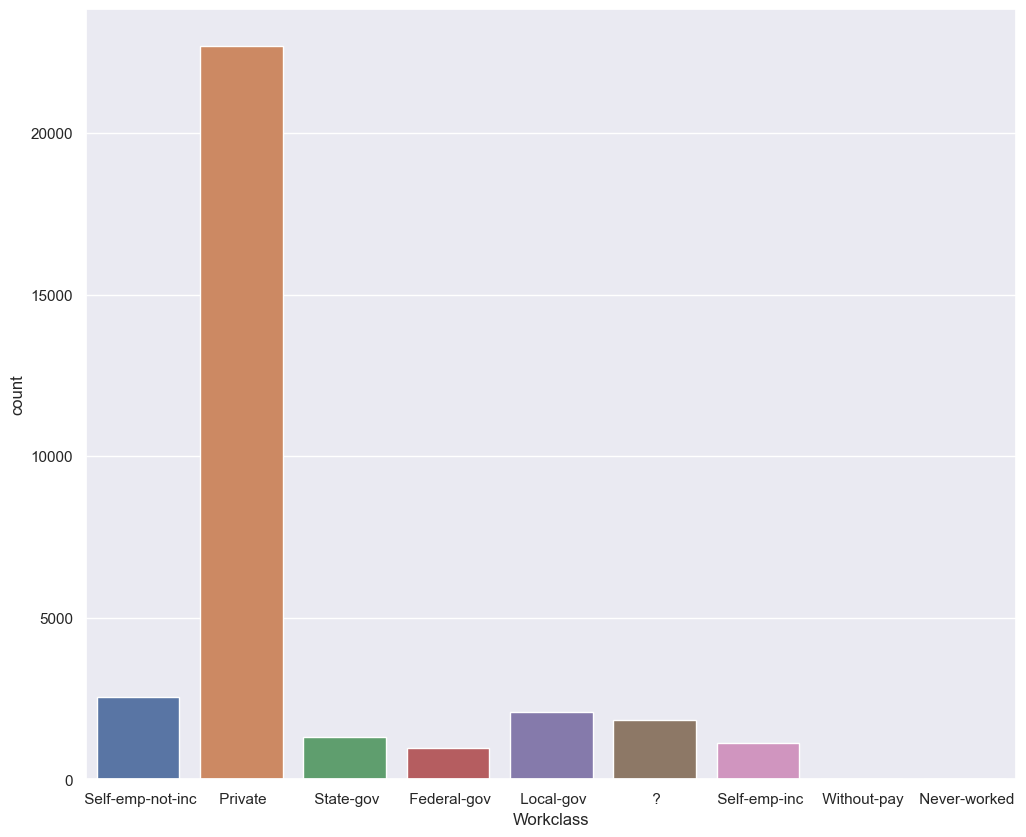

In [15]:
plt.figure(figsize=(12,10))
sns.countplot(x=df['Workclass'],data=df)
df['Workclass'].value_counts()

In [16]:
pd.crosstab(df['Workclass'],df['Income'],normalize='index').apply(lambda x: round(x*100,2))

Income,<=50K,>50K
Workclass,,
?,89.60,10.40
Federal-gov,61.35,38.65
Local-gov,70.52,29.48
Never-worked,100.00,0.00
Private,78.13,21.87
Self-emp-inc,44.27,55.73
Self-emp-not-inc,71.51,28.49
State-gov,72.78,27.22
Without-pay,100.00,0.00


<Axes: xlabel='Workclass', ylabel='count'>

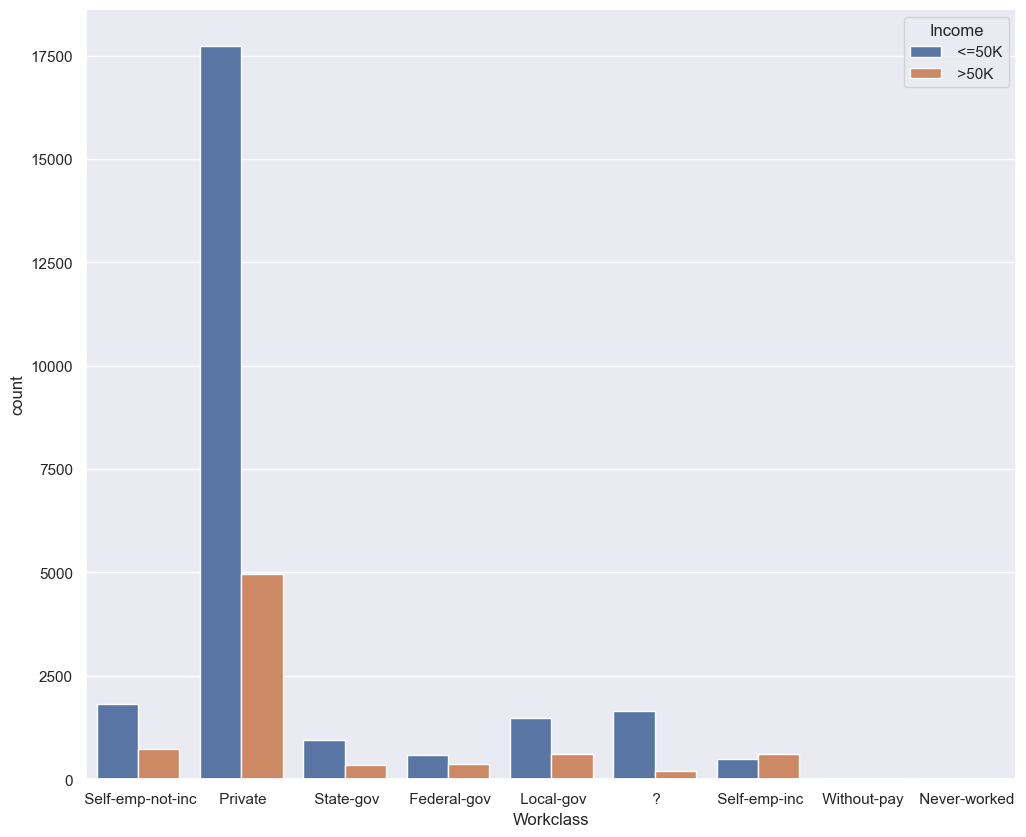

In [17]:
plt.figure(figsize=(12,10))
sns.countplot(x='Workclass', data=df, hue='Income')

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

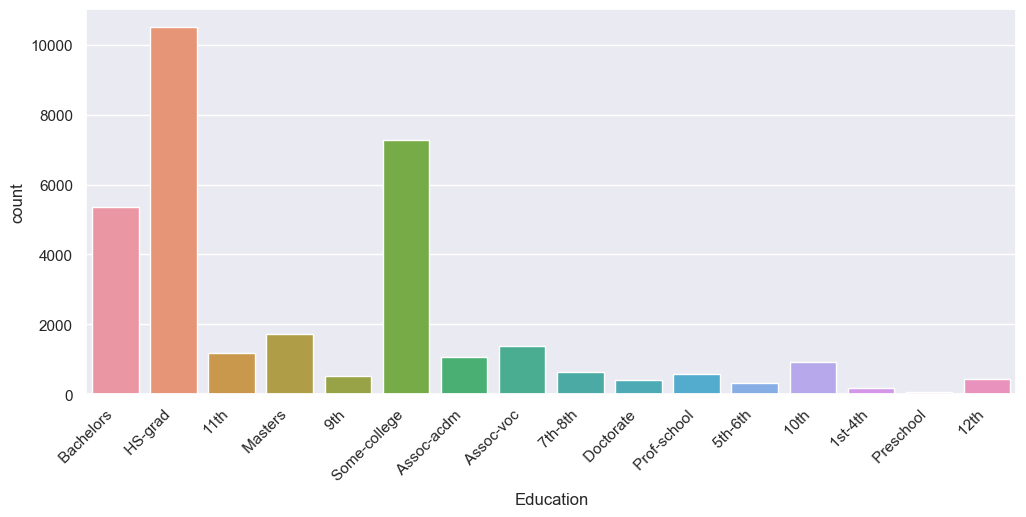

In [18]:
plt.figure(figsize=(12,5))
sns.countplot(x=df['Education'],data=df)
plt.xticks(rotation=45,ha='right') 
df['Education'].value_counts()

In [19]:
pd.crosstab(df['Education'],df['Income'],normalize='index').apply(lambda x : round(x*100,2))

Income,<=50K,>50K
Education,,
10th,93.35,6.65
11th,94.89,5.11
12th,92.38,7.62
1st-4th,96.43,3.57
5th-6th,95.20,4.80
7th-8th,93.81,6.19
9th,94.75,5.25
Assoc-acdm,75.16,24.84
Assoc-voc,73.88,26.12


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

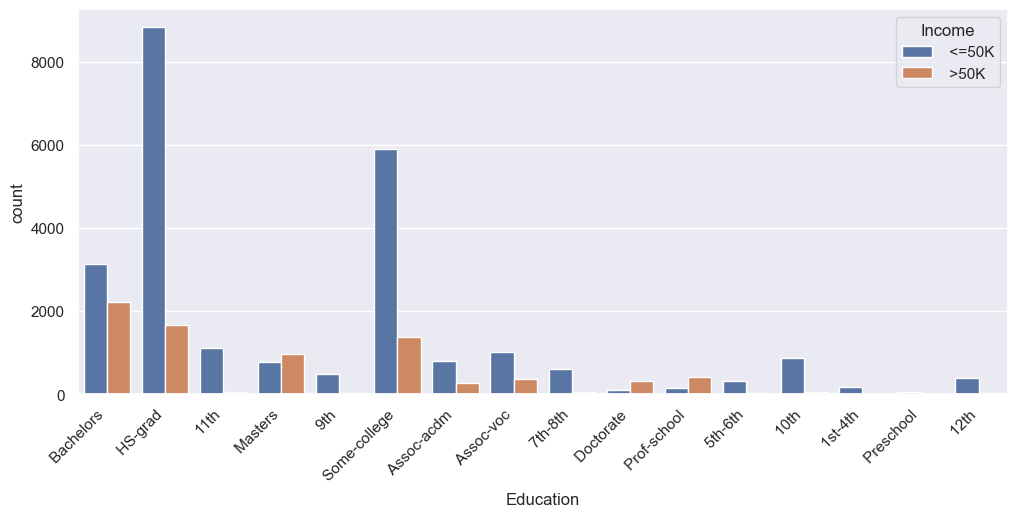

In [20]:
plt.figure(figsize=(12,5))
sns.countplot(x='Education', data=df, hue='Income')
plt.xticks(rotation=45,ha='right')

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

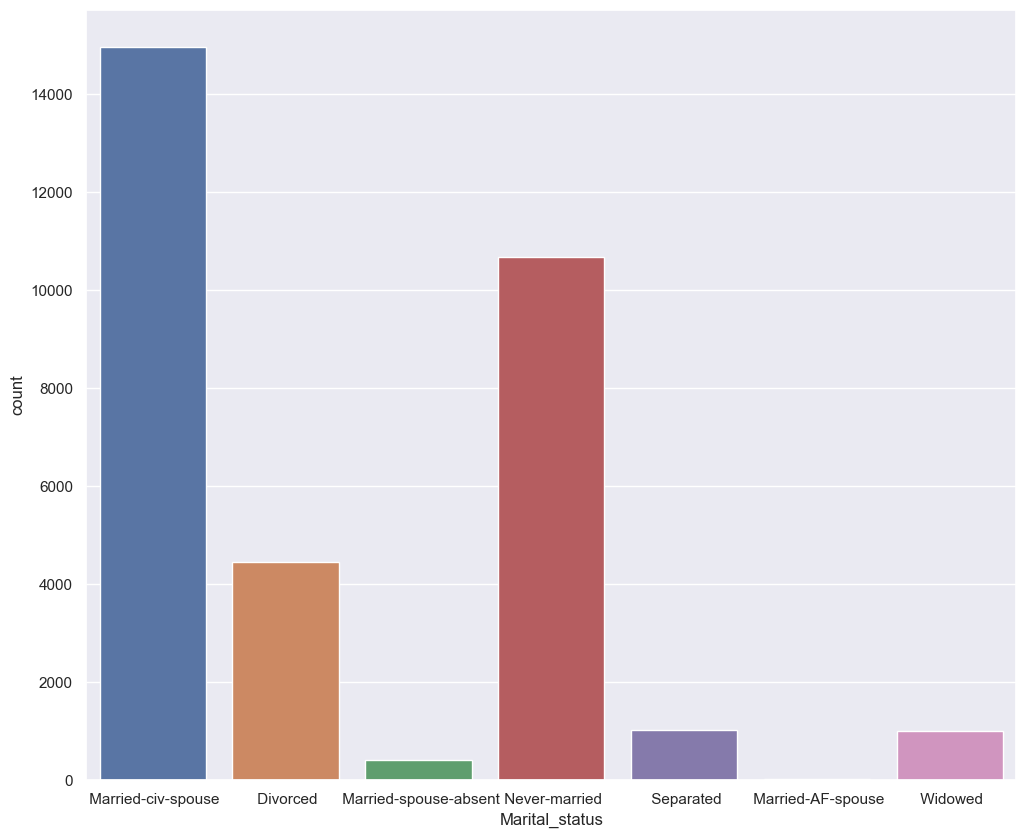

In [21]:
plt.figure(figsize=(12,10))
sns.countplot(x=df['Marital_status'],data=df)
df['Marital_status'].value_counts()

In [22]:
pd.crosstab(df['Marital_status'],df['Income'],normalize='index').apply(lambda x: round(x*100,2))

Income,<=50K,>50K
Marital_status,,
Divorced,89.58,10.42
Married-AF-spouse,56.52,43.48
Married-civ-spouse,55.32,44.68
Married-spouse-absent,91.87,8.13
Never-married,95.40,4.60
Separated,93.56,6.44
Widowed,91.44,8.56


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Divorced'),
  Text(2, 0, ' Married-spouse-absent'),
  Text(3, 0, ' Never-married'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

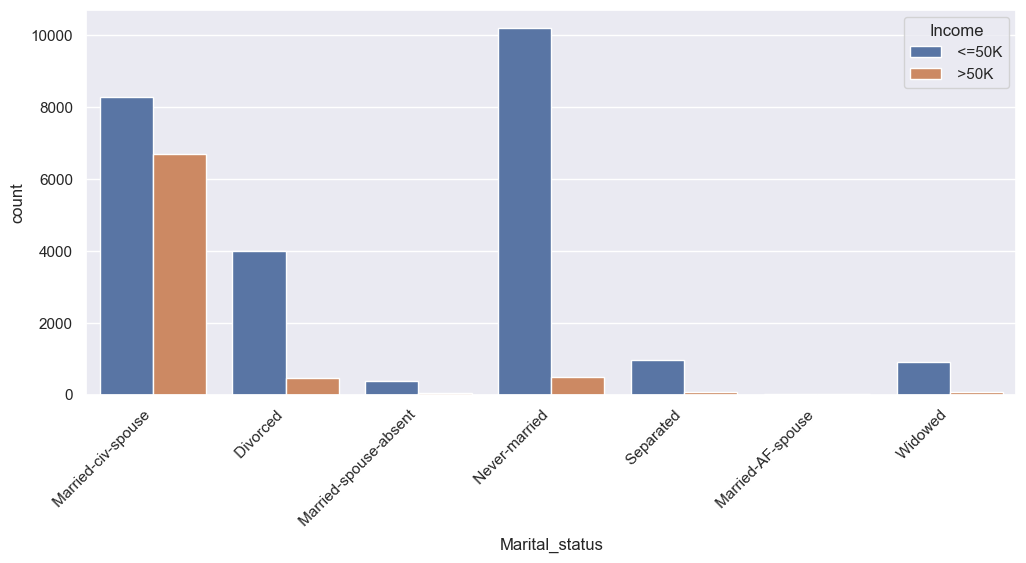

In [23]:
plt.figure(figsize=(12,5))
sns.countplot(x='Marital_status', data=df, hue='Income')
plt.xticks(rotation=45,ha='right')

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

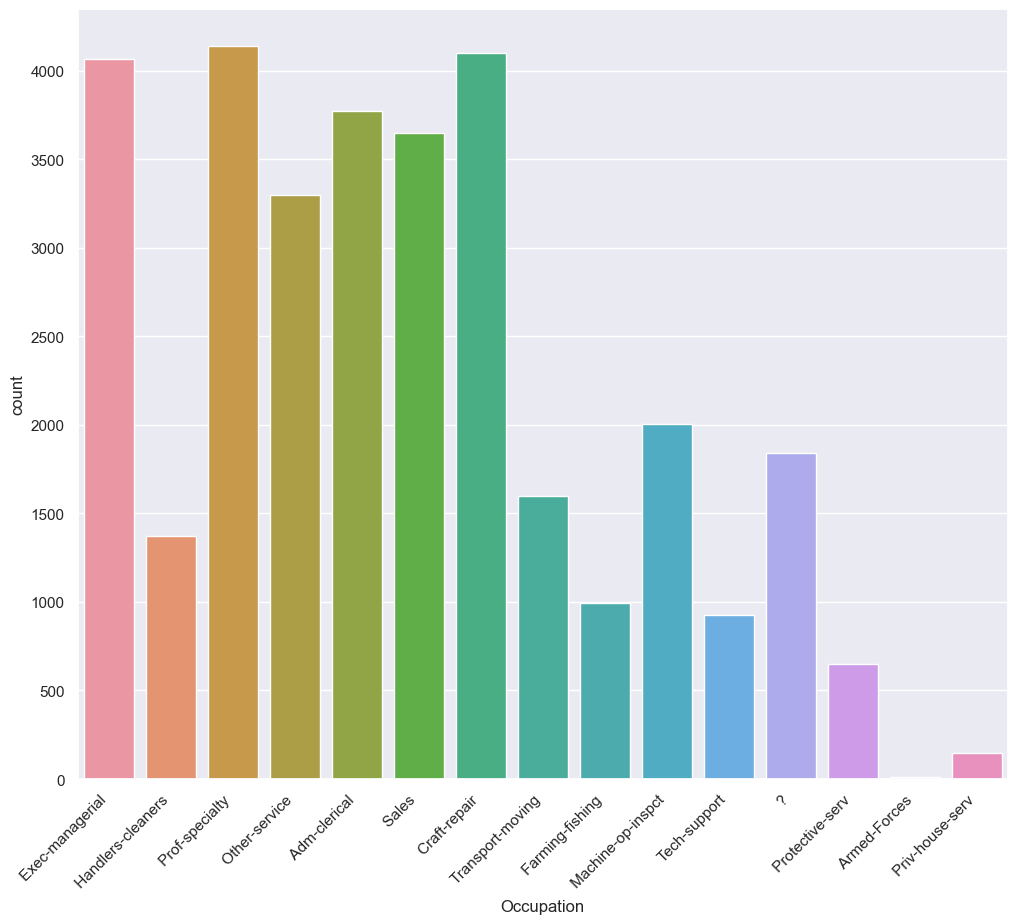

In [24]:
plt.figure(figsize=(12,10))
sns.countplot(x=df['Occupation'],data=df)
plt.xticks(rotation=45,ha='right')
df['Occupation'].value_counts()

In [25]:
pd.crosstab(df['Occupation'],df['Income'],normalize='index').apply(lambda x: round(x*100,2))

Income,<=50K,>50K
Occupation,,
?,89.64,10.36
Adm-clerical,86.55,13.45
Armed-Forces,88.89,11.11
Craft-repair,77.34,22.66
Exec-managerial,51.60,48.40
Farming-fishing,88.43,11.57
Handlers-cleaners,93.72,6.28
Machine-op-inspct,87.51,12.49
Other-service,95.84,4.16


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' ?'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Armed-Forces'),
  Text(14, 0, ' Priv-house-serv')])

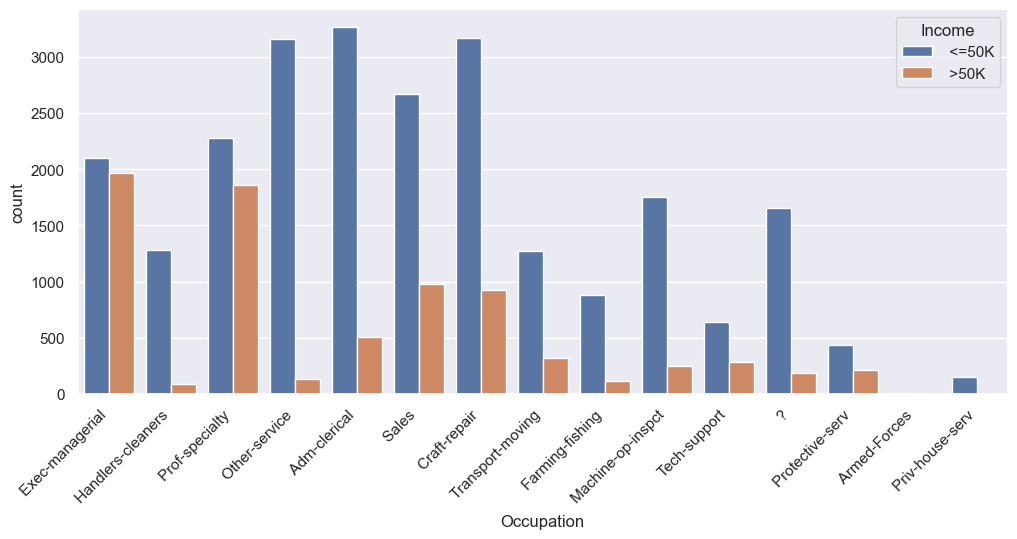

In [26]:
plt.figure(figsize=(12,5))
sns.countplot(x='Occupation', data=df, hue='Income')
plt.xticks(rotation=45,ha='right')

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

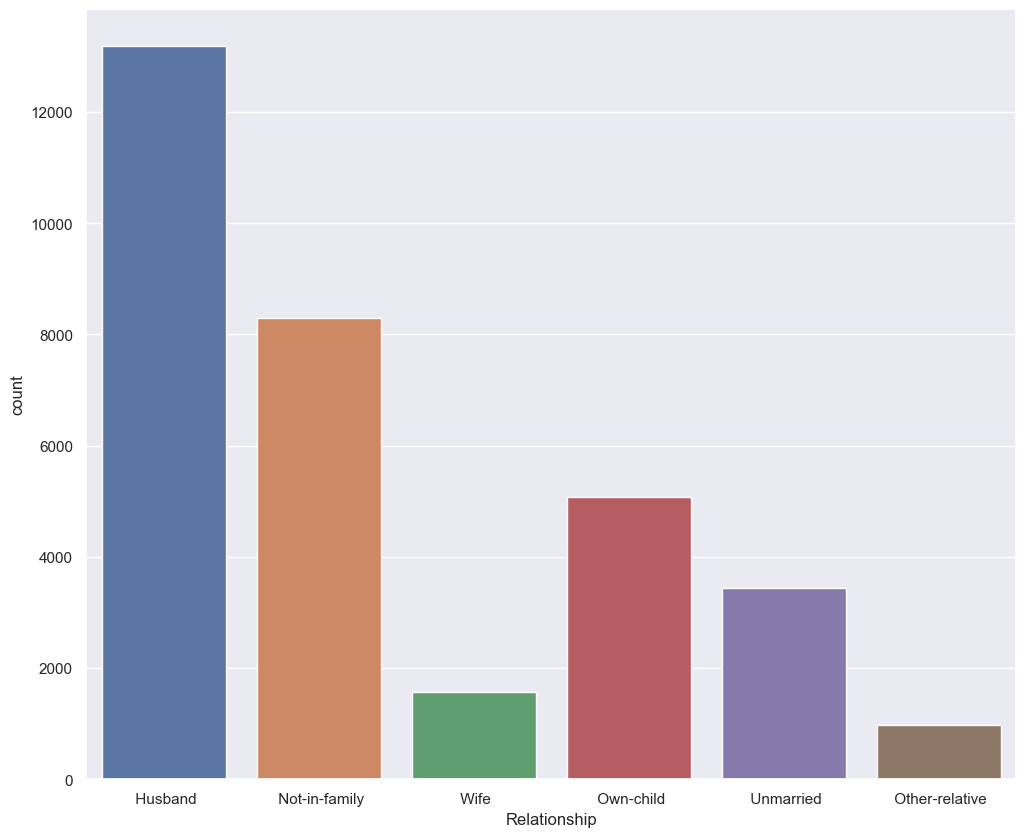

In [27]:
plt.figure(figsize=(12,10))
sns.countplot(x=df['Relationship'],data=df)
df['Relationship'].value_counts()

In [28]:
pd.crosstab(df['Relationship'],df['Income'],normalize='index').apply(lambda x: round(x*100,2))

Income,<=50K,>50K
Relationship,,
Husband,55.14,44.86
Not-in-family,89.69,10.31
Other-relative,96.23,3.77
Own-child,98.68,1.32
Unmarried,93.67,6.33
Wife,52.49,47.51


<Axes: xlabel='Relationship', ylabel='count'>

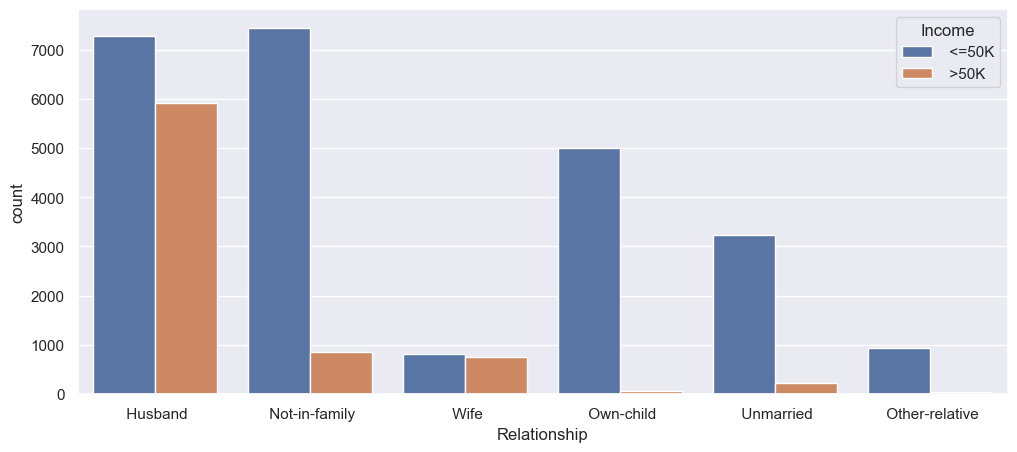

In [29]:
plt.figure(figsize=(12,5))
sns.countplot(x='Relationship', data=df, hue='Income')

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

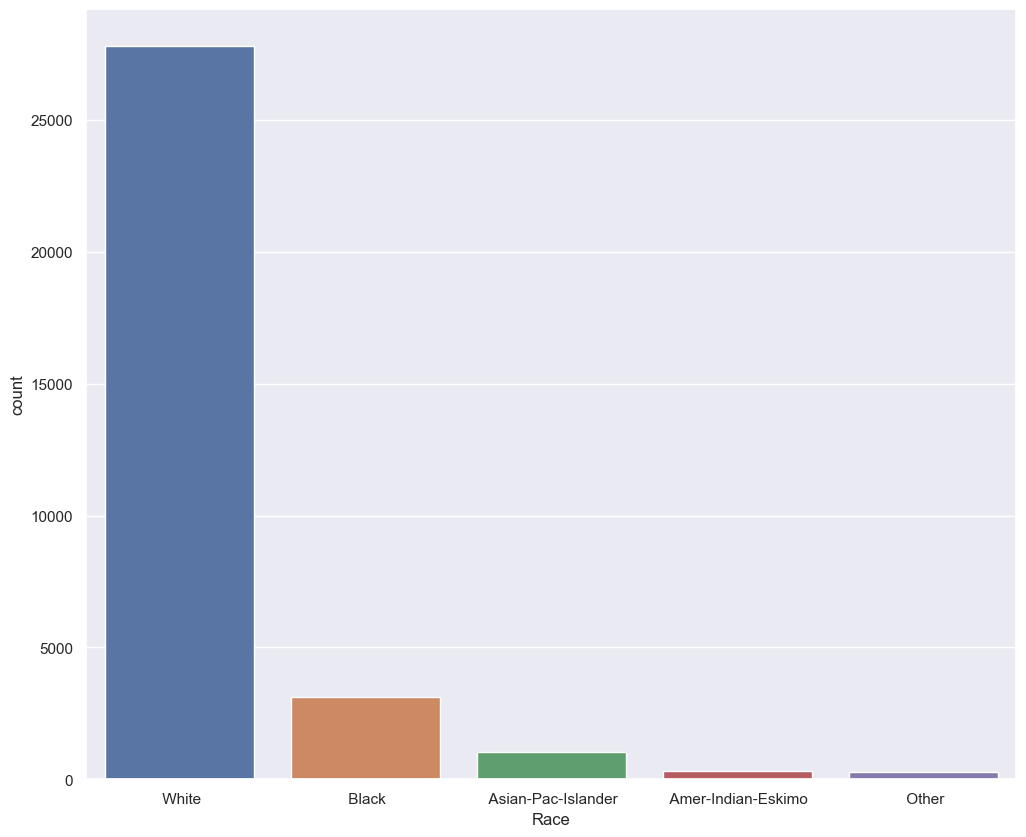

In [30]:
plt.figure(figsize=(12,10))
sns.countplot(x=df['Race'],data=df)
df['Race'].value_counts()

In [31]:
pd.crosstab(df['Race'],df['Income'],normalize='index').apply(lambda x: round(x*100,2))

Income,<=50K,>50K
Race,,
Amer-Indian-Eskimo,88.42,11.58
Asian-Pac-Islander,73.44,26.56
Black,87.61,12.39
Other,90.77,9.23
White,74.41,25.59


<Axes: xlabel='Race', ylabel='count'>

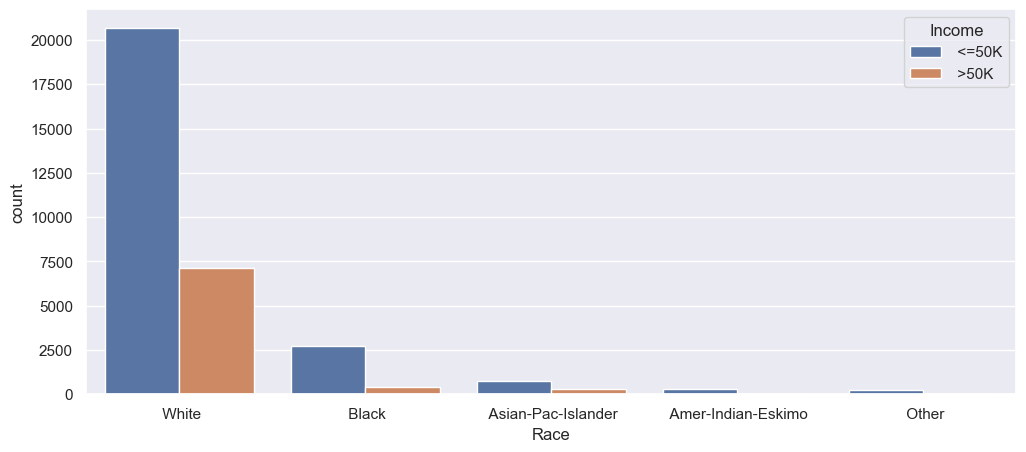

In [32]:
plt.figure(figsize=(12,5))
sns.countplot(x='Race', data=df, hue='Income')

 Male      21789
 Female    10771
Name: Sex, dtype: int64

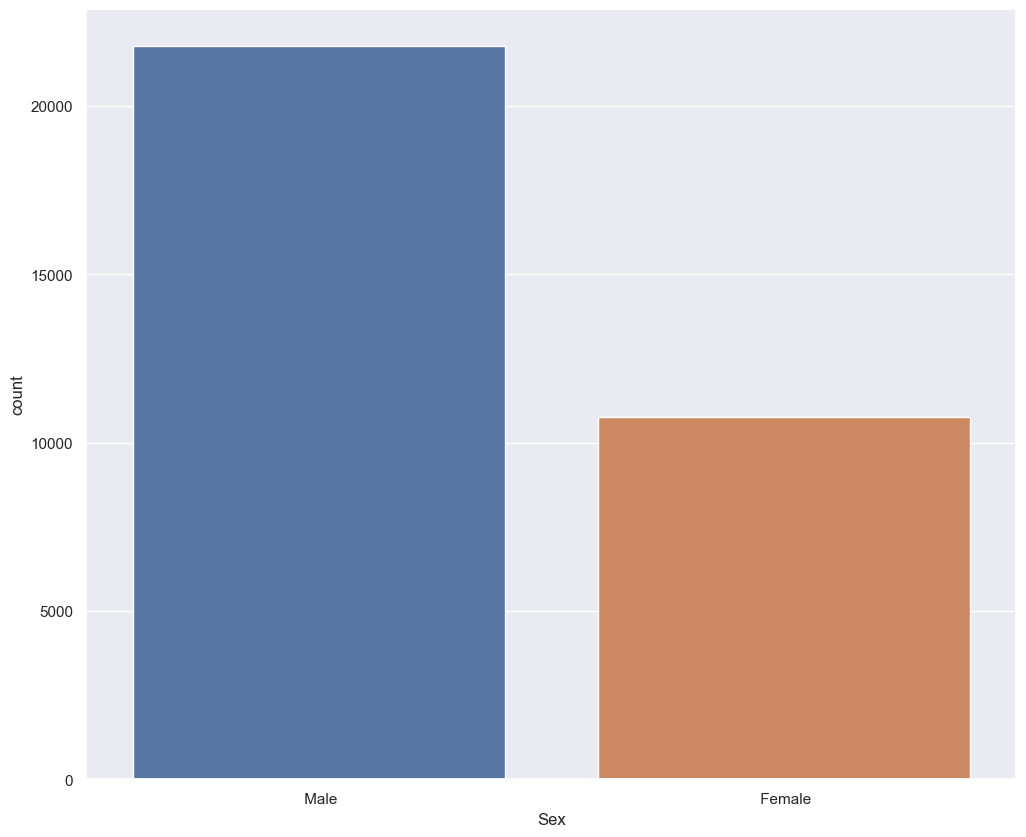

In [33]:
plt.figure(figsize=(12,10))
sns.countplot(x=df['Sex'],data=df)
df['Sex'].value_counts()

In [34]:
pd.crosstab(df['Sex'],df['Income'],normalize='index').apply(lambda x: round(x*100,2))

Income,<=50K,>50K
Sex,,
Female,89.05,10.95
Male,69.42,30.58


<Axes: xlabel='Sex', ylabel='count'>

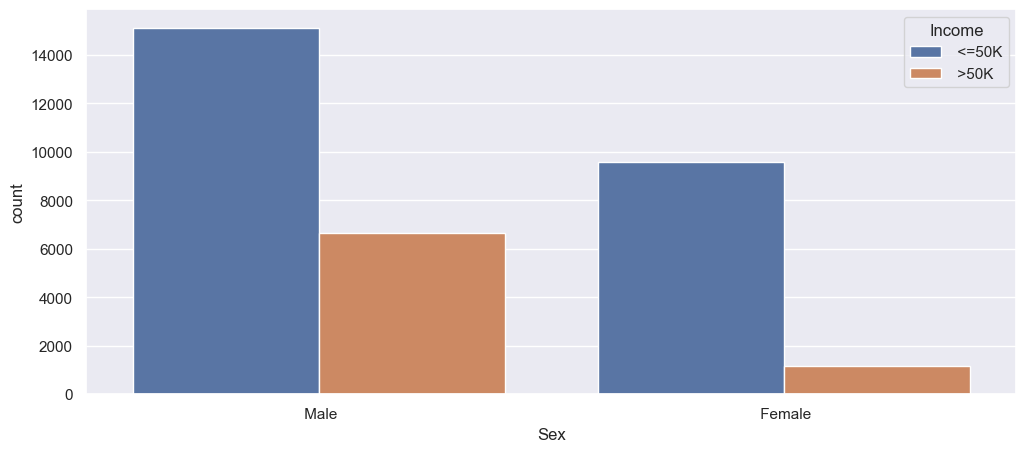

In [35]:
plt.figure(figsize=(12,5))
sns.countplot(x='Sex', data=df, hue='Income')

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

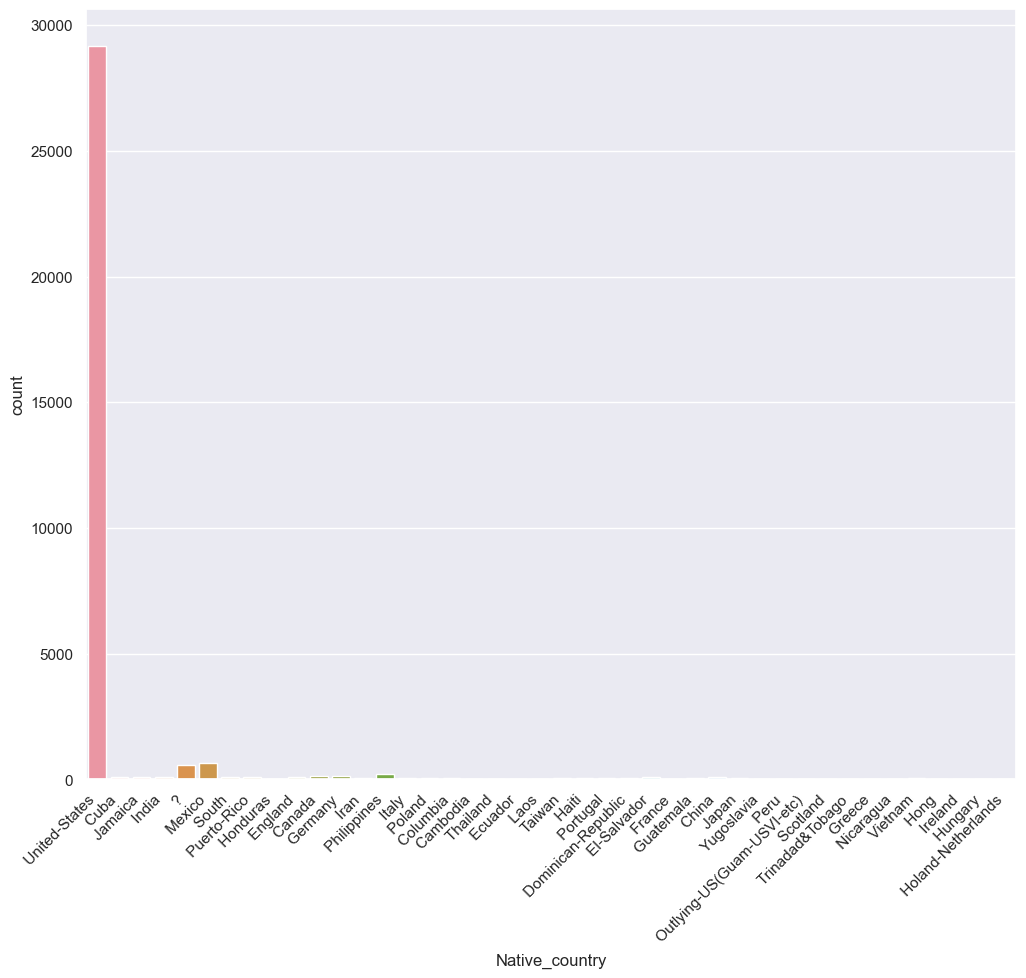

In [36]:
plt.figure(figsize=(12,10))
sns.countplot(x=df['Native_country'],data=df)
plt.xticks(rotation=45,ha='right')
df['Native_country'].value_counts()

In [37]:
pd.crosstab(df['Native_country'],df['Income'],normalize='index').apply(lambda x: round(x*100,2))

Income,<=50K,>50K
Native_country,,
?,74.96,25.04
Cambodia,63.16,36.84
Canada,67.77,32.23
China,73.33,26.67
Columbia,96.61,3.39
Cuba,73.68,26.32
Dominican-Republic,97.14,2.86
Ecuador,85.71,14.29
El-Salvador,91.51,8.49


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, ' United-States'),
  Text(1, 0, ' Cuba'),
  Text(2, 0, ' Jamaica'),
  Text(3, 0, ' India'),
  Text(4, 0, ' ?'),
  Text(5, 0, ' Mexico'),
  Text(6, 0, ' South'),
  Text(7, 0, ' Puerto-Rico'),
  Text(8, 0, ' Honduras'),
  Text(9, 0, ' England'),
  Text(10, 0, ' Canada'),
  Text(11, 0, ' Germany'),
  Text(12, 0, ' Iran'),
  Text(13, 0, ' Philippines'),
  Text(14, 0, ' Italy'),
  Text(15, 0, ' Poland'),
  Text(16, 0, ' Columbia'),
  Text(17, 0, ' Cambodia'),
  Text(18, 0, ' Thailand'),
  Text(19, 0, ' Ecuador'),
  Text(20, 0, ' Laos'),
  Text(21, 0, ' Taiwan'),
  Text(22, 0, ' Haiti'),
  Text(23, 0, ' Portugal'),
  Text(24, 0, ' Dominican-Republic'),
  Text(25, 0, ' El-Salvador'),
  Text(26, 0, ' France'),
  Text(27, 0, ' Guatemala'),
  Text(28, 0, ' China'),
  Text(29, 0, ' Japan'),
  

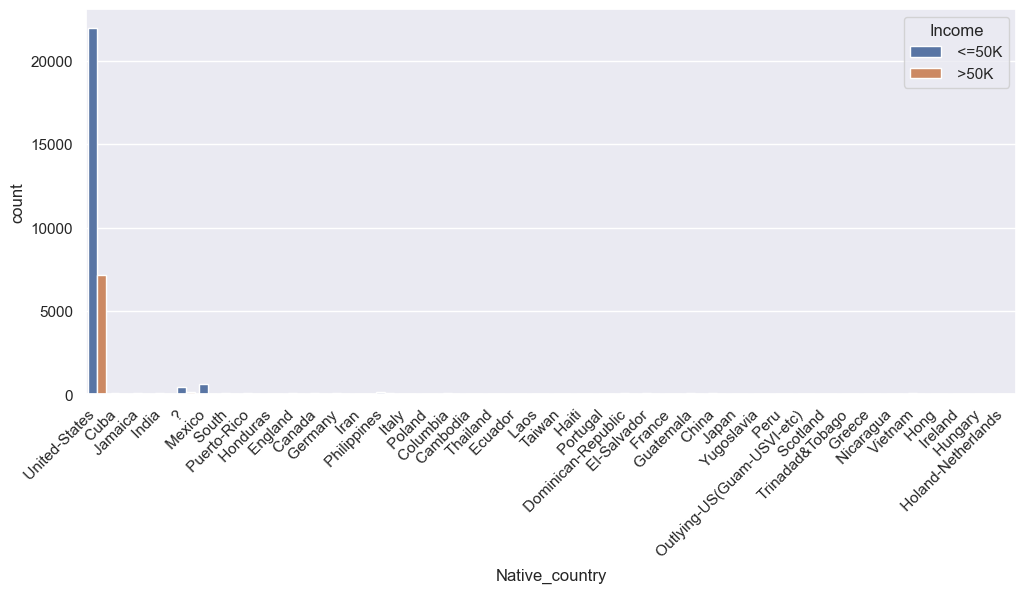

In [38]:
plt.figure(figsize=(12,5))
sns.countplot(x='Native_country', data=df, hue='Income')
plt.xticks(rotation=45,ha='right')

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

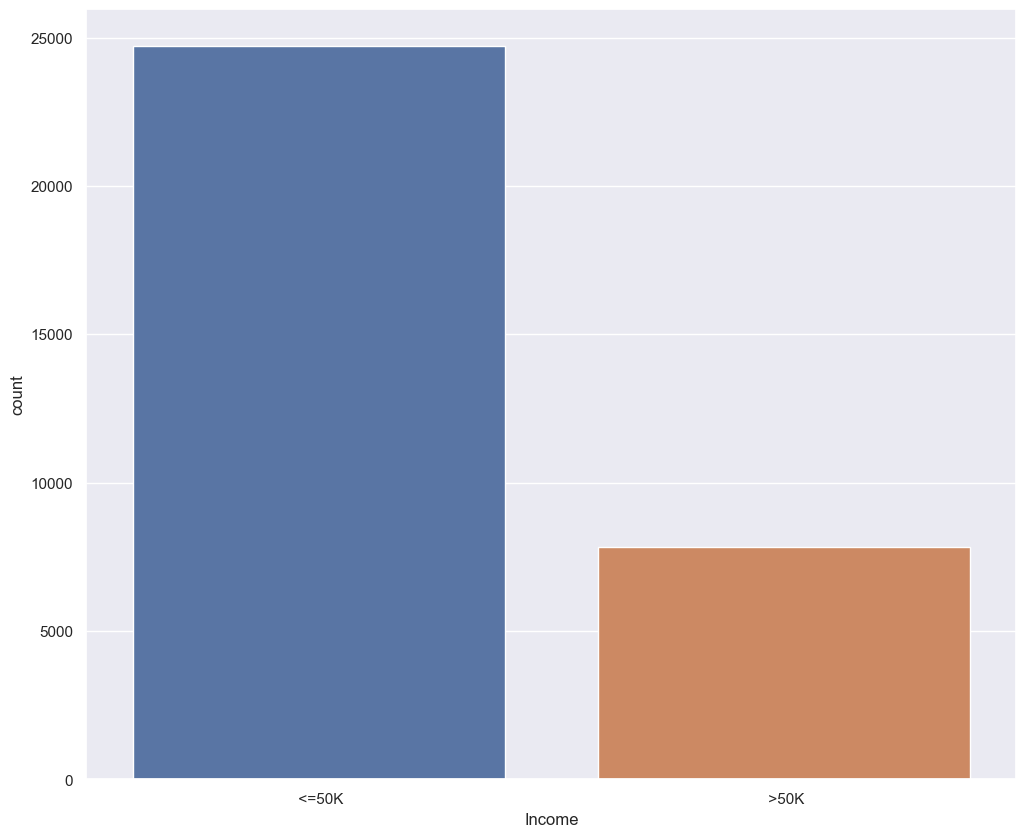

In [39]:
plt.figure(figsize=(12,10))
sns.countplot(x=df['Income'],data=df)
df['Income'].value_counts()

From the above plots, we can deduce the following facts:


1. For the column "workclass," the maximum number of people are from the private job sector. In almost all of the workclass categories, people who are earning <=50K are greater than the people who are earning >50, except for "self-emp-inc.".


2. For the column "Education," the maximum number of people are from the "HS-grad" category, followed by "some college" and "bachelors." People who have done a master's, doctorate, or PhD are more likely to earn more than $50,000.


3. For the column "Marital_status," the maximum number of people are married-civilian-spouse, followed by "never-married" people and divorced. People who are married-civilian-spouses have almost the same probability of earning >50K as those who earn <=50K. Divorced and never-married people are least likely to earn >50K in income.


4. For the column "Occupation," the maximum number of people are from "prof-speciality," followed by "craft repair,", "exec-managerial," and so on. In almost all of the occupation categories, people who are earning <=50K are greater than the people who are earning more than 50K, except for "exec-managerial," where we can see almost equal people for both income classes.


5. For the column "Relationship,"  most of the people are classified as "husbands," followed by "not-in-family,"  "own children," and so on. In almost all of the relationship categories, people who are earning <=50K are greater than the people who are earning more than 50K, except for wife," where we can see almost equal people for both income classes.


6. For the column "race," the maximum number of people are white. In all of the race categories, people who are earning <=50 are greater than the people who are earning more than 50.


7. For the column "Sex," the number of males is greater than the number of females. Both males and females are more likely to earn <=50K.


8. For the "Country" column, the maximum number of people are from the United States in our dataset, and people who are earning <=50K are way more than people who are earning >50K.

In [40]:
numerical_col

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

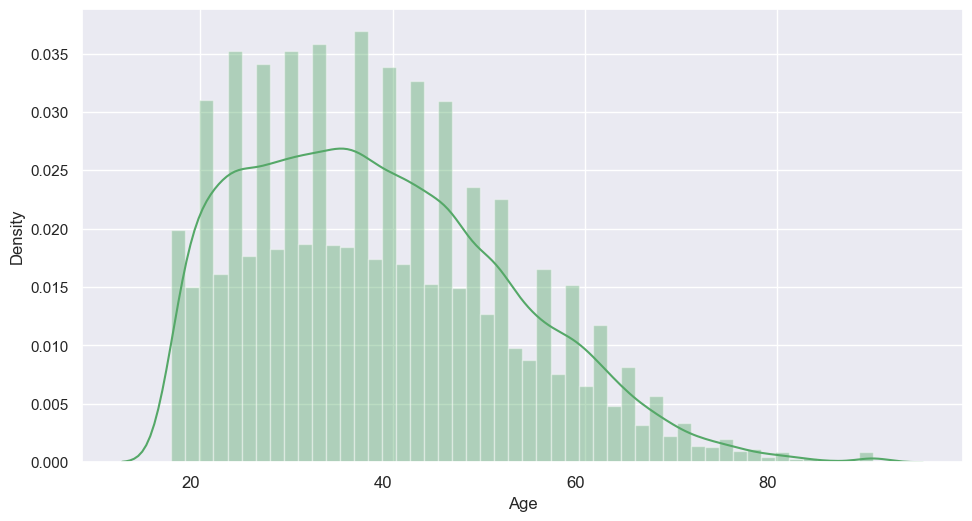

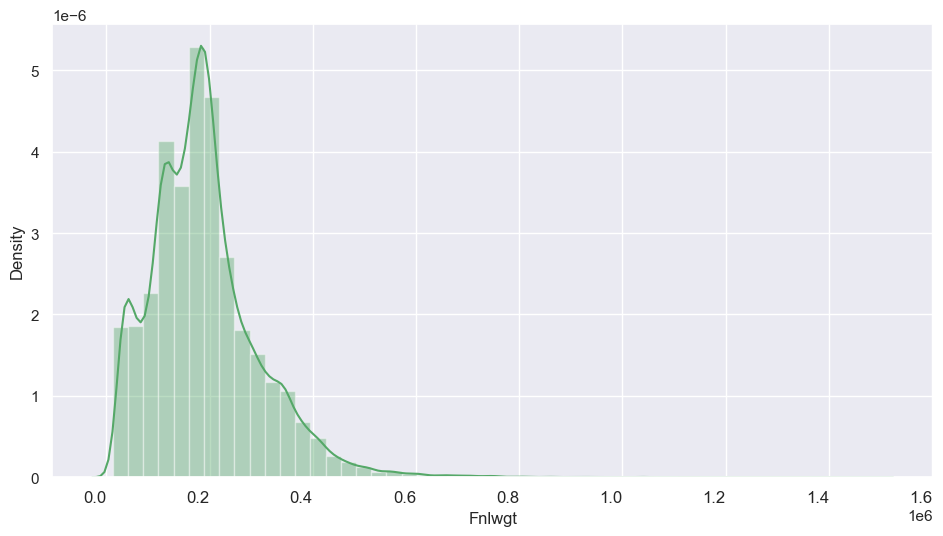

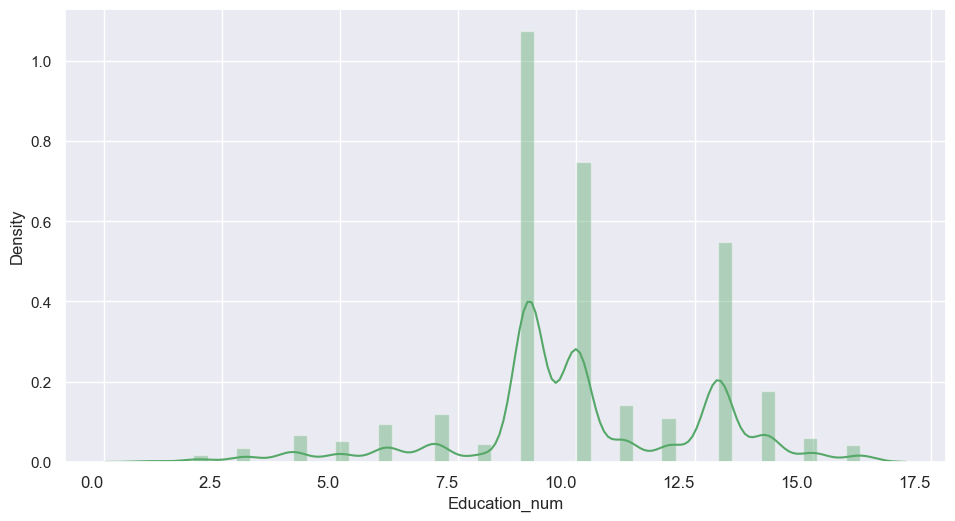

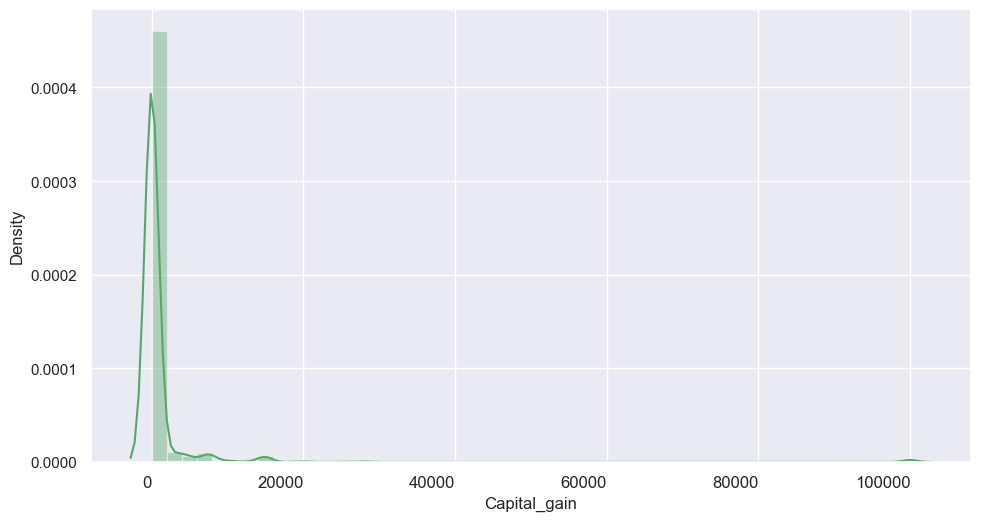

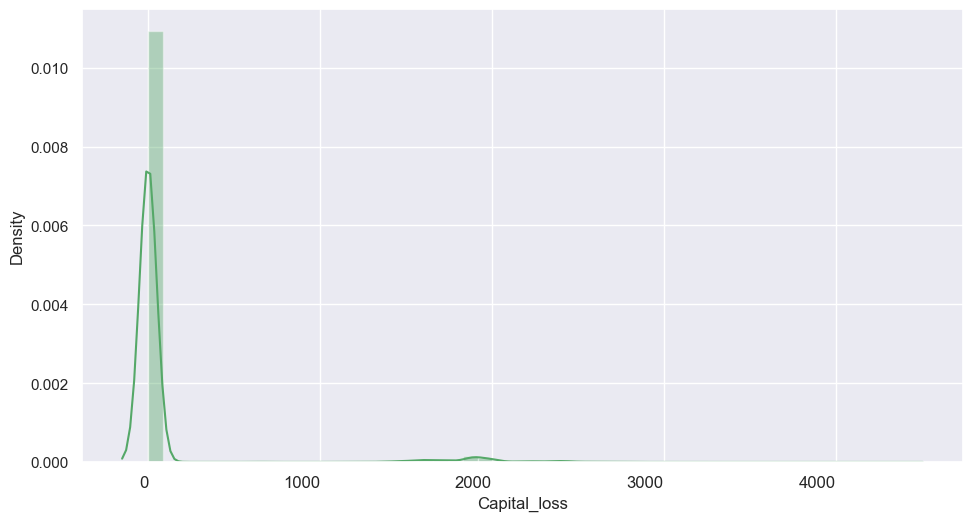

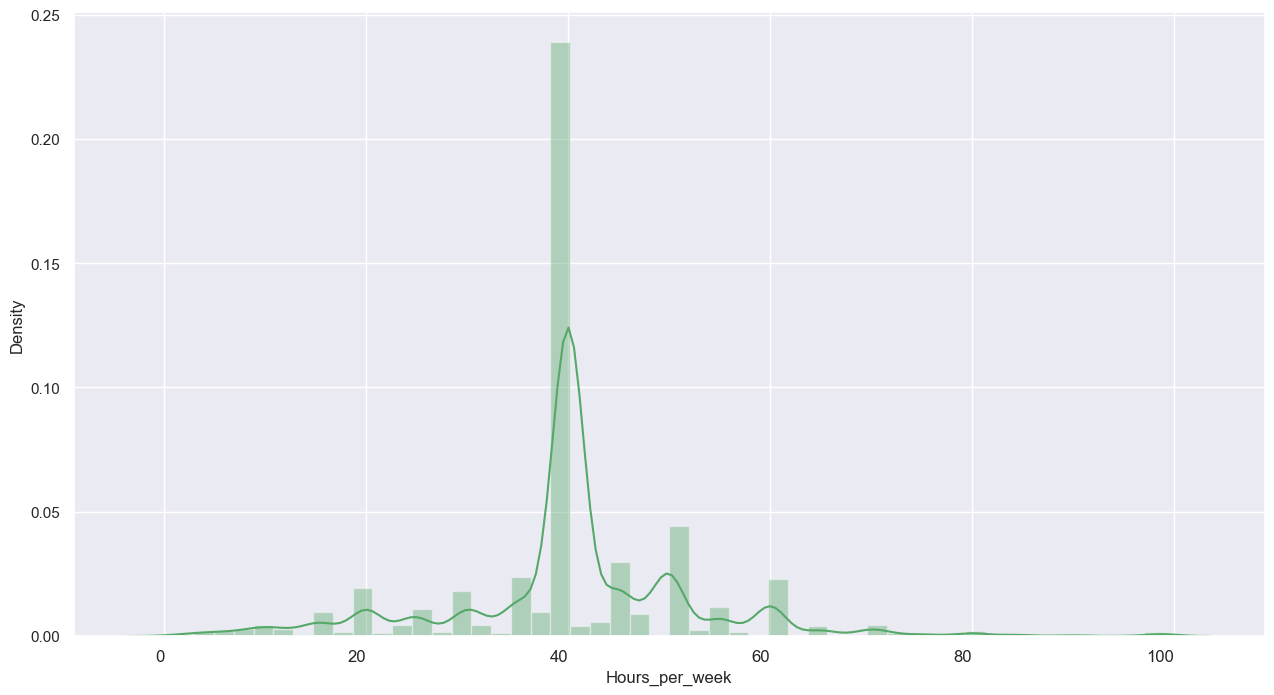

In [41]:
#Plotting the distribution graphs of all the numerical columns

plotnumber=1
for i in numerical_col:
    if plotnumber<=6:
        plt.figure(figsize=(25,20))
        plt.subplot(3,2,plotnumber)
        sns.distplot(df[i],color='g')
        plt.xticks(ha='right', fontsize=12)
    plotnumber+=1
plt.tight_layout()
plt.show()

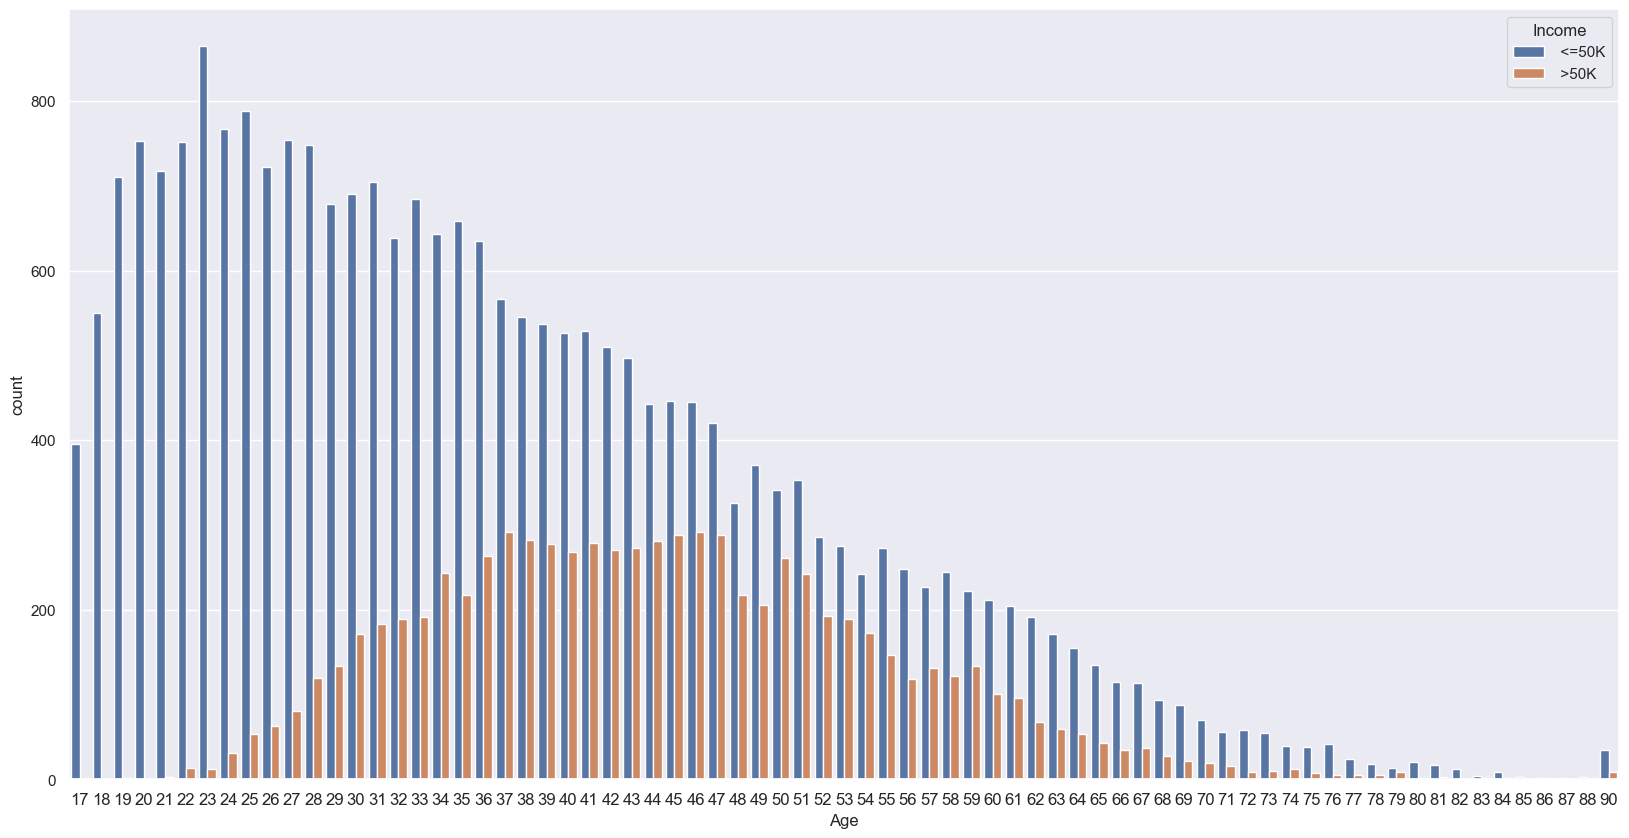

In [42]:
plt.figure(figsize=(20,10))
sns.countplot(x='Age', data=df, hue='Income')
plt.xticks(fontsize=12)
plt.show()

The above graph shows the distribution of Income across Age.

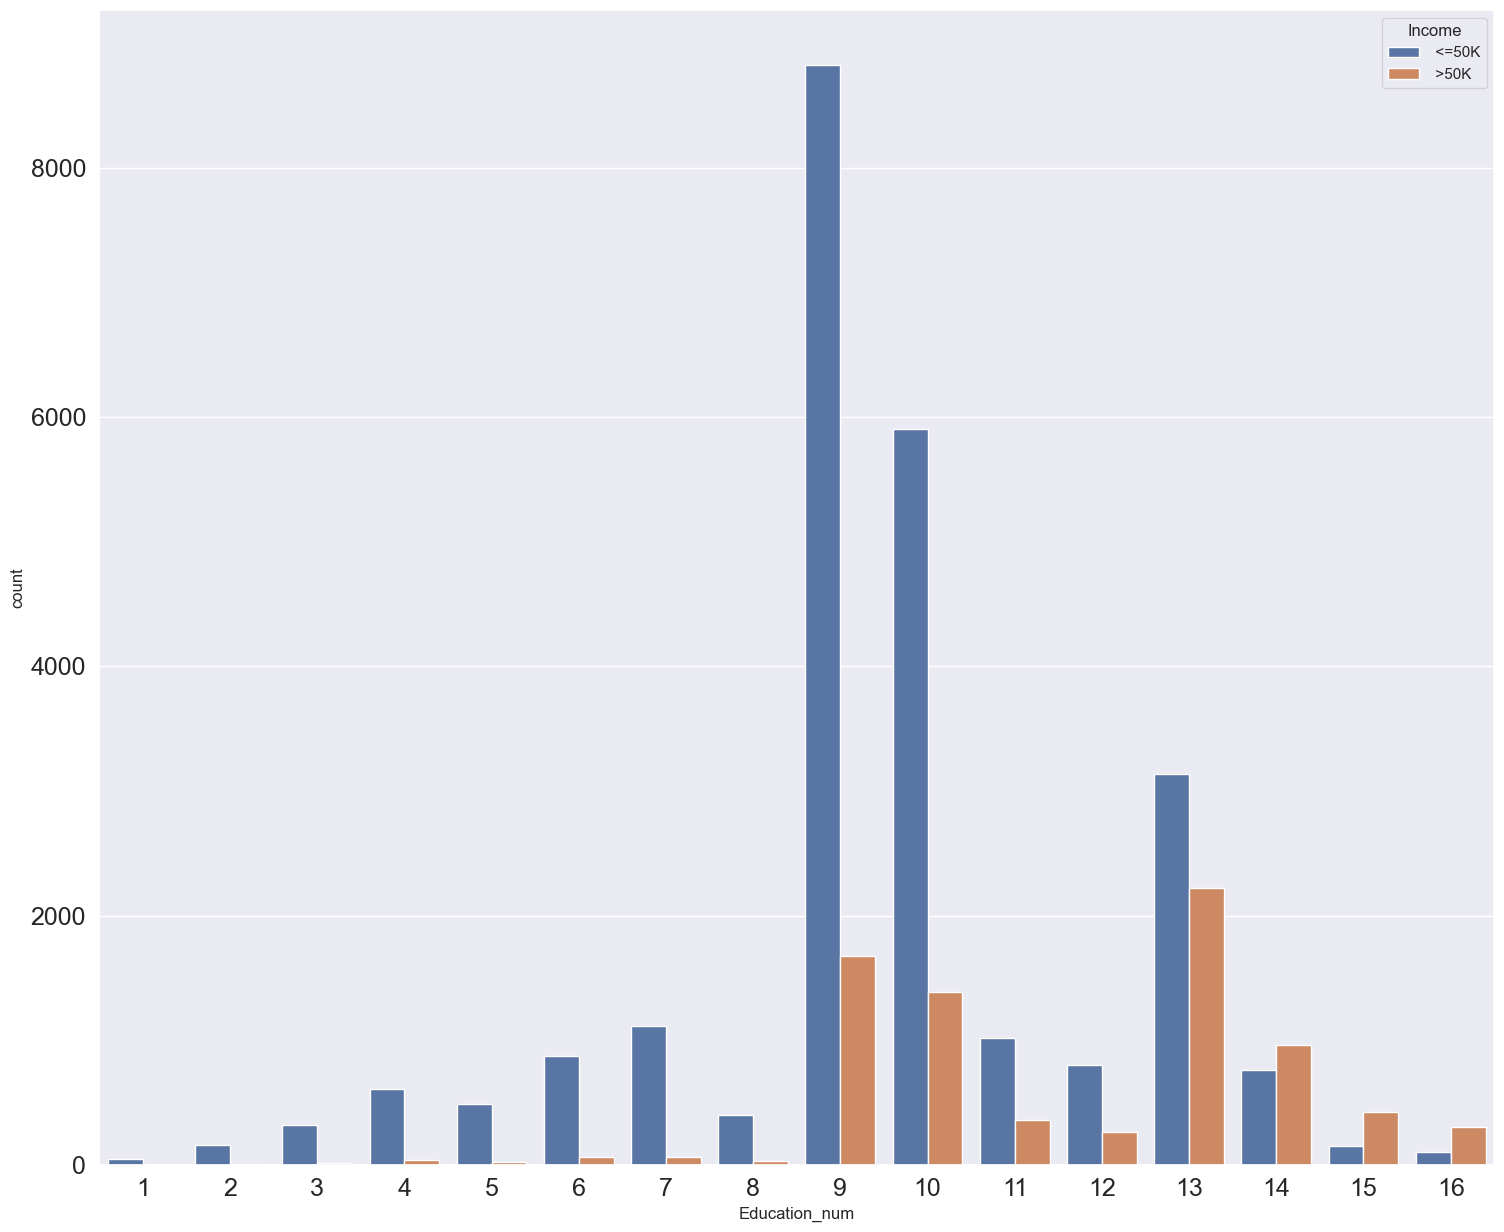

In [43]:
plt.figure(figsize=(18,15))
sns.countplot(x='Education_num', data=df, hue='Income')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

People with 9 and 10 years of education are most likely to earn <=50K, and people with 13 years of education are most likely to earn >50K.

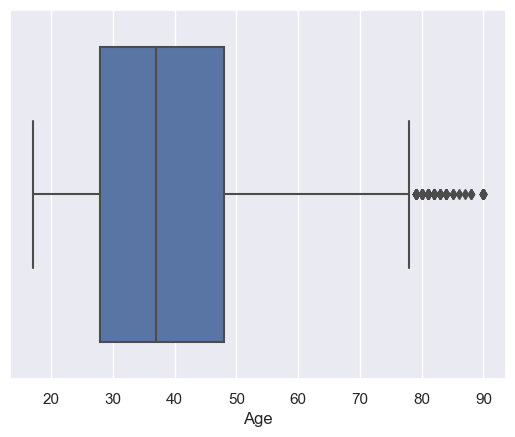

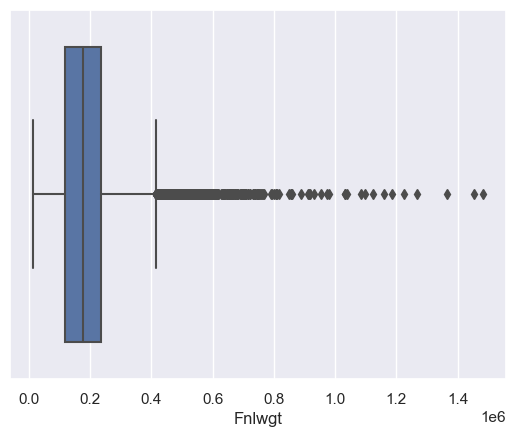

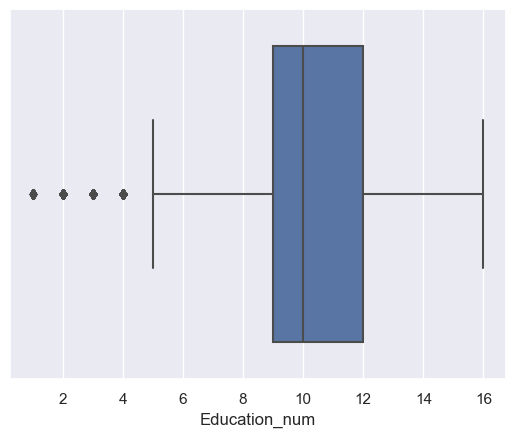

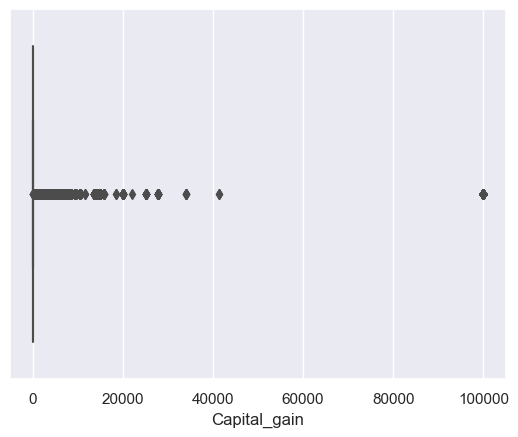

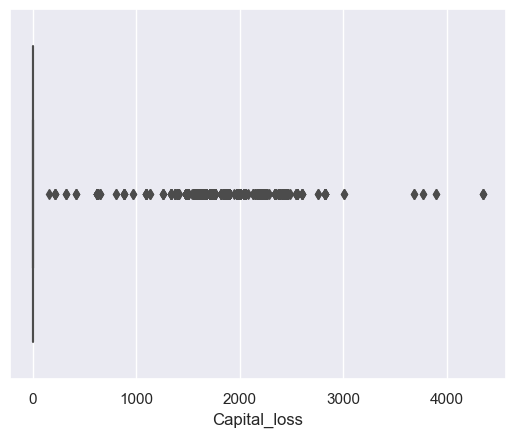

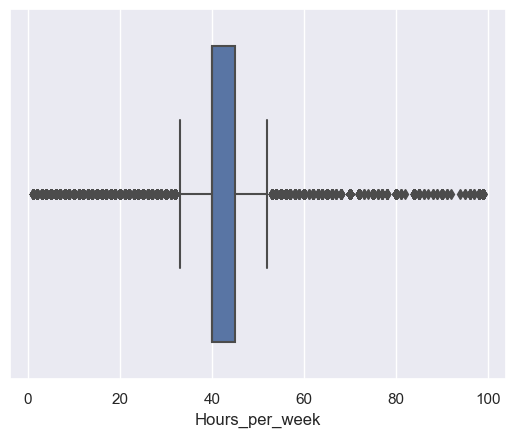

In [44]:
#Checking the outliers in the dataset

for i in numerical_col:
    sns.boxplot(x=i,data=df)
    plt.xlabel(i,fontsize=12)
    plt.show()

Multivariate Analysis

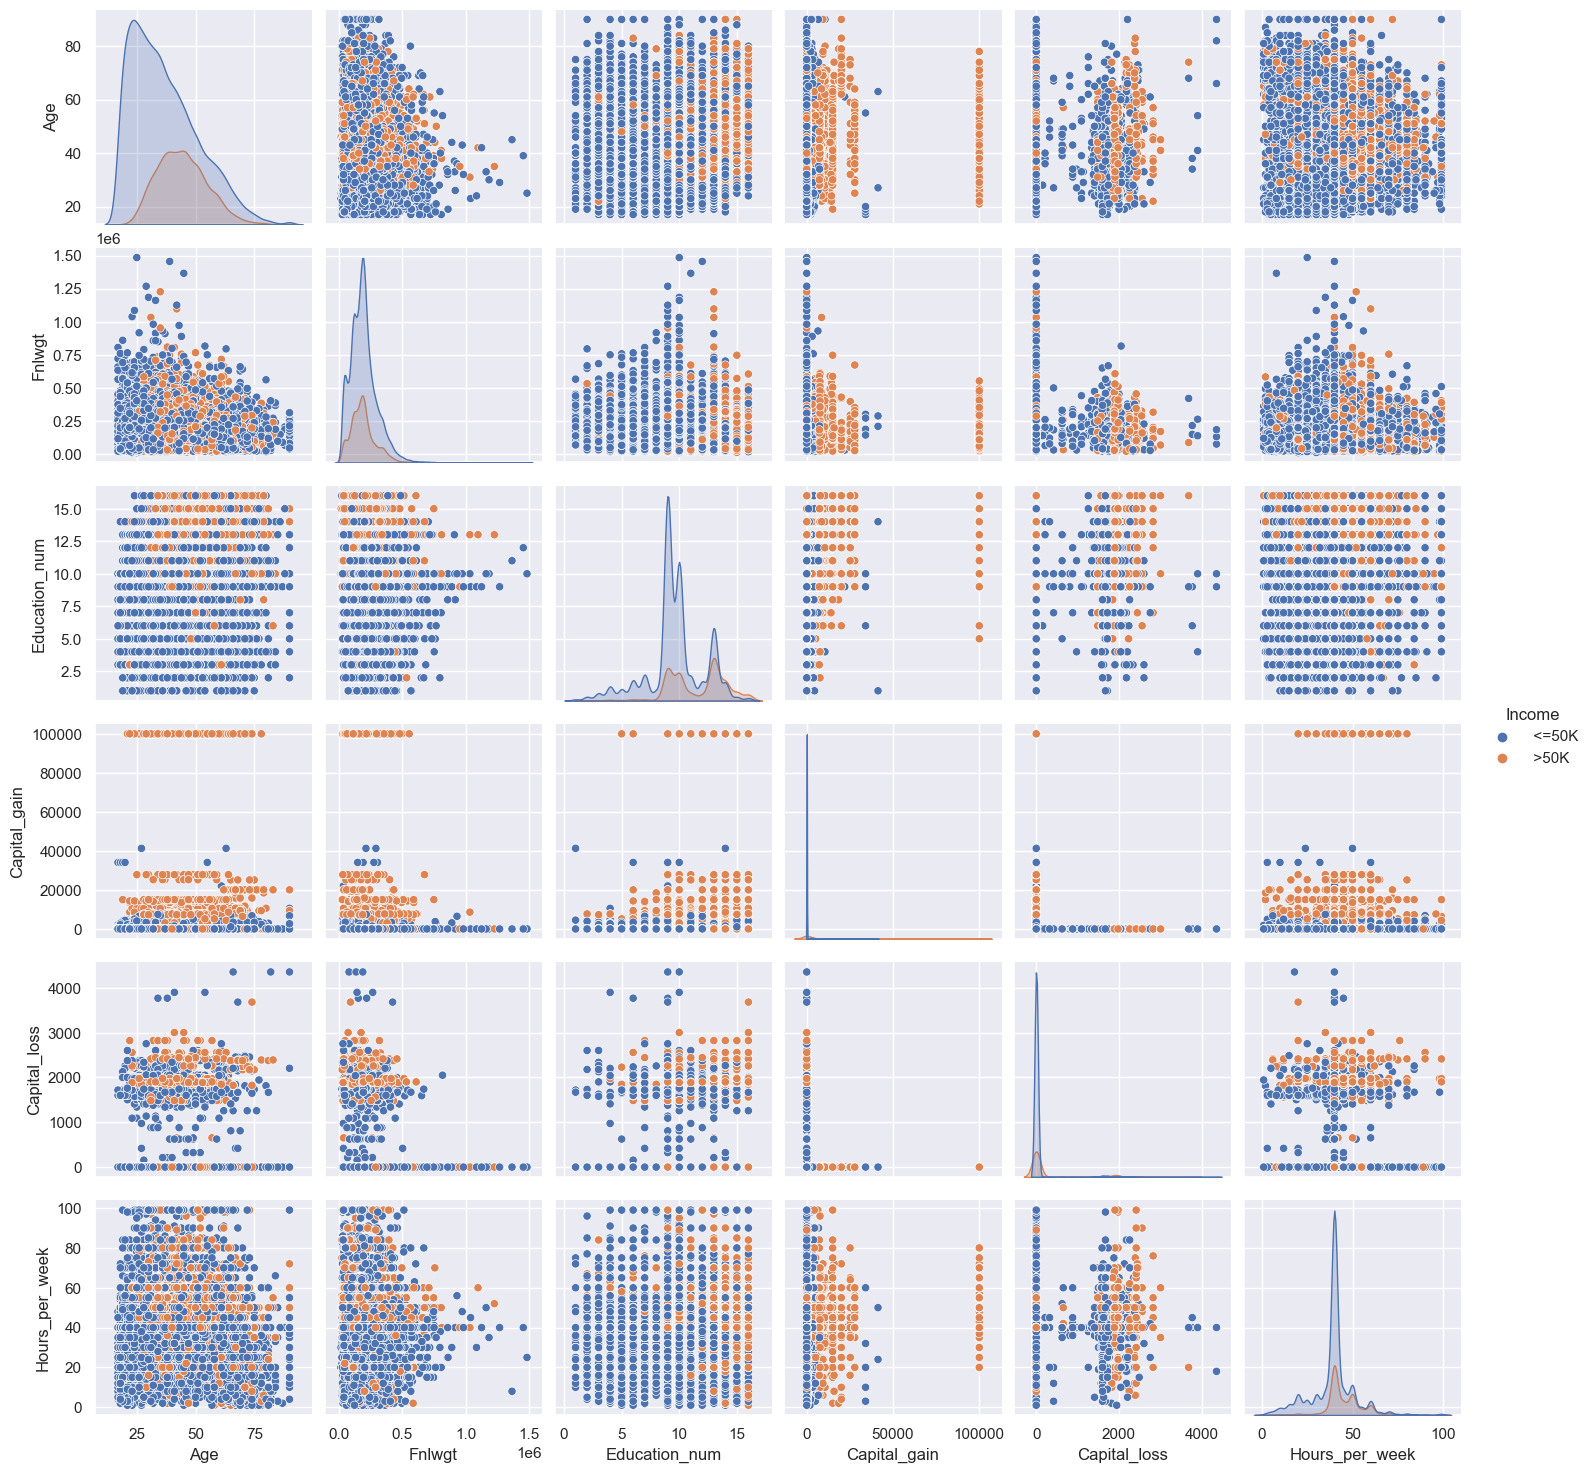

In [45]:
sns.pairplot(data=df,hue='Income')

In [46]:
#Encoding the target column with integer values

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Income']=le.fit_transform(df['Income'])

In [47]:
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234039
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770,-0.009481
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127,0.335182
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409,0.223333
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256,0.150523
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000,0.229690
Income,0.234039,-0.009481,0.335182,0.223333,0.150523,0.229690,1.000000


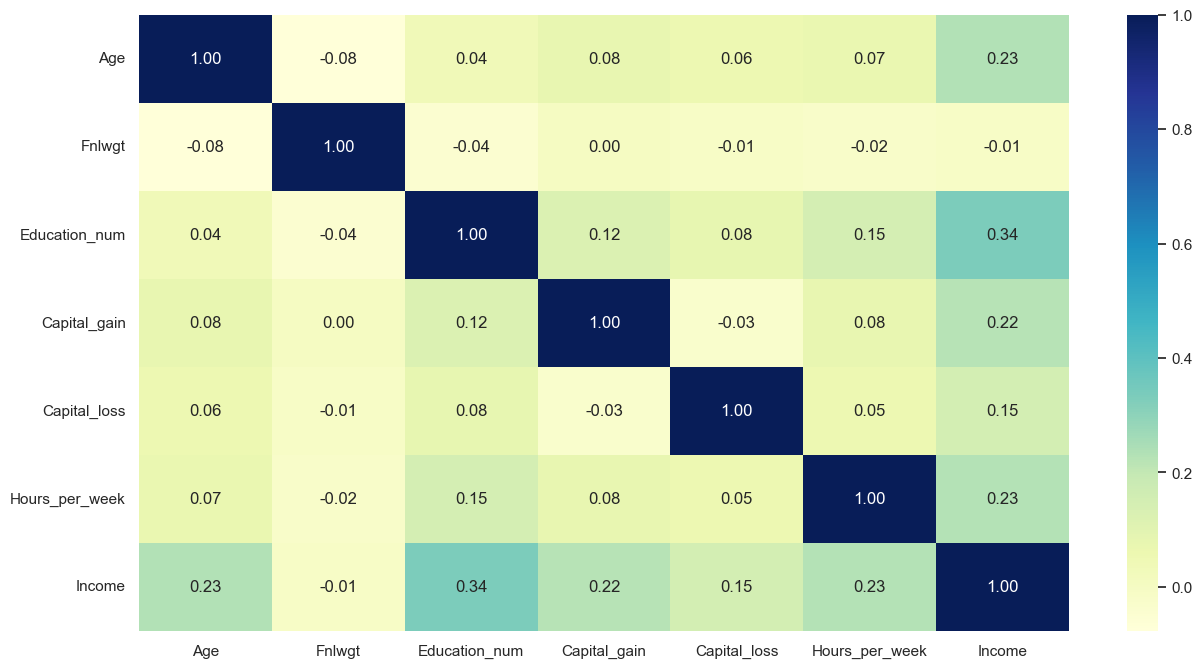

In [48]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), fmt='0.2f', annot=True, cmap='YlGnBu')
plt.show()

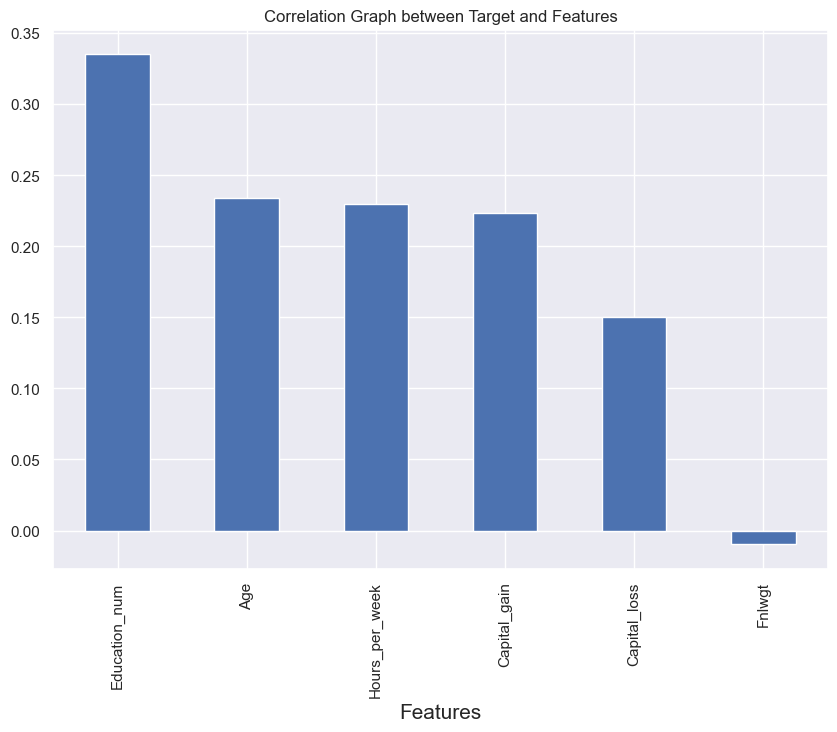

In [49]:
plt.figure(figsize=(10,7))
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot.bar()
plt.title("Correlation Graph between Target and Features")
plt.xlabel("Features",fontsize=15)
plt.show()

Conclusion:

Except for "Fnlwgt," the target variable has a positive correlation with the numerical features highest with the number of years of education, followed by age, hours per week, and capital gain.

Most of the people have private work classes, are high school graduates, white, live in the United States, are married civilian spouses, possess specialist skills, are male, have 9 years of education, and work 40 hours per week.

# Data Preprocessing

Imputing the value of "?" with mode as "?" is present in 3 of our categorical columns.

In [50]:
#Replacing the value of "?" with nan values first

df=df.replace(' ?',np.nan)

In [51]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [52]:
#Imputing the nan values with the mode of the data

df['Workclass'].fillna(df['Workclass'].mode()[0], inplace=True)
df['Occupation'].fillna(df['Occupation'].mode()[0], inplace=True)
df['Native_country'].fillna(df['Native_country'].mode()[0], inplace=True)

In [53]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in categorical_col:
    df[i]=le.fit_transform(df[i])

In [54]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


Seperating Target and Features

In [55]:
X=df.drop('Income',axis=1)
Y=df['Income']

In [56]:
Y.value_counts()

0    24719
1     7841
Name: Income, dtype: int64

In [57]:
#Balancing the target variable

from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [58]:
X,Y=sm.fit_resample(X,Y)

In [59]:
Y.value_counts()

0    24719
1    24719
Name: Income, dtype: int64

In [60]:
#Checking the skewness of the dataset

X.skew().sort_values(ascending=False)

Capital_gain      8.362279
Capital_loss      3.726711
Fnlwgt            1.394884
Relationship      1.133459
Age               0.336823
Marital_status    0.323195
Hours_per_week    0.119561
Occupation        0.014385
Workclass        -0.107504
Education_num    -0.426696
Sex              -0.838993
Education        -0.967430
Race             -2.500258
Native_country   -4.347909
dtype: float64

In [61]:
skewness=["Capital_gain","Capital_loss","Fnlwgt","Relationship","Sex","Education","Race","Native_country"]

In [63]:
#Removing the skewness from the dataset

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

In [64]:
df[skewness] = pt.fit_transform(df[skewness].values)
df[skewness].head()

,Capital_gain,Capital_loss,Fnlwgt,Relationship,Sex,Education,Race,Native_country
0,-0.30137,-0.221213,-1.089889,-1.094635,0.703087,-0.477012,0.412893,0.294407
1,-0.30137,-0.221213,0.398743,0.134511,0.703087,0.090482,0.412893,0.294407
2,-0.30137,-0.221213,0.562540,-1.094635,0.703087,-2.067600,-2.431920,0.294407
3,-0.30137,-0.221213,1.340398,1.549018,-1.422298,-0.477012,-2.431920,-3.411817
4,-0.30137,-0.221213,0.957182,1.549018,-1.422298,0.395133,0.412893,0.294407


In [68]:
#Scaling the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.777276,1.841630,-1.016075,-0.395270,1.041492,-0.291275,-0.824756,-0.736989,0.393790,0.664936,-0.19525,-0.259385,-2.538135,0.266083
1,-0.190483,-0.004125,0.250791,0.189267,-0.602273,-1.805714,-0.288929,-0.081879,0.393790,0.664936,-0.19525,-0.259385,-0.178272,0.266083
2,1.019216,-0.004125,0.433399,-2.733421,-1.424155,-0.291275,-0.288929,-0.736989,-2.076638,0.664936,-0.19525,-0.259385,-0.178272,0.266083
3,-0.996949,-0.004125,1.426023,-0.395270,1.041492,-0.291275,0.782725,2.538561,-2.076638,-1.503904,-0.19525,-0.259385,-0.178272,-5.758065
4,-0.271130,-0.004125,0.910727,0.481536,1.452434,-0.291275,-0.824756,2.538561,0.393790,-1.503904,-0.19525,-0.259385,-0.178272,0.266083


In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [70]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif['features'] = X.columns
vif

,VIF Values,features
0,1.164431,Age
1,1.007345,Workclass
2,1.011411,Fnlwgt
3,1.101788,Education
4,1.180012,Education_num
5,1.140577,Marital_status
6,1.015734,Occupation
7,1.757257,Relationship
8,1.033416,Race
9,1.568284,Sex


# Modelling

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [72]:
maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=i,test_size=.30)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"at Random State =",maxRS)

Best accuracy is  0.7860032362459547 at Random State = 135


In [73]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=135,test_size=.30)

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [75]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [76]:
for m in model:
    m.fit(x_train,y_train)
    pred= m.predict(x_test)
    print('Accuracy Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print('Accuracy Score of the training data is', m.score(x_train,y_train)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('*'*100)

Accuracy Score of  LogisticRegression() is 78.60032362459548
Accuracy Score of the training data is 77.26405825579378
Confusion Matrix of  LogisticRegression()  is 
 [[5726 1726]
 [1448 5932]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.78      7452
           1       0.77      0.80      0.79      7380

    accuracy                           0.79     14832
   macro avg       0.79      0.79      0.79     14832
weighted avg       0.79      0.79      0.79     14832

****************************************************************************************************
Accuracy Score of  RidgeClassifier() is 77.3799892125135
Accuracy Score of the training data is 76.53008148875917
Confusion Matrix of  RidgeClassifier()  is 
 [[5378 2074]
 [1281 6099]]
              precision    recall  f1-score   support

           0       0.81      0.72      0.76      7452
           1       0.75      0.83      0.78      7380

    accuracy                 

# Cross Validation

In [77]:
from sklearn.model_selection import cross_val_score

In [78]:
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,X,Y,cv=5, scoring='accuracy').mean()*100)
    print('\n')
    print('*'*50)
    print('\n')

Accuracy_Score of  LogisticRegression() is 78.60032362459548
cross Validation accuracy score of  LogisticRegression()  is  77.49305910837774


**************************************************


Accuracy_Score of  RidgeClassifier() is 77.3799892125135
cross Validation accuracy score of  RidgeClassifier()  is  76.58082018557269


**************************************************


Accuracy_Score of  DecisionTreeClassifier() is 84.91100323624595
cross Validation accuracy score of  DecisionTreeClassifier()  is  84.83977358389282


**************************************************


Accuracy_Score of  SVC() is 85.32227615965479
cross Validation accuracy score of  SVC()  is  85.11073921723238


**************************************************


Accuracy_Score of  KNeighborsClassifier() is 84.4997303128371
cross Validation accuracy score of  KNeighborsClassifier()  is  84.57272560189037


**************************************************


Accuracy_Score of  RandomForestClassifier() is

# Hyper Parameter Tuning

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
parameters = {'n_estimators': [50, 100], 'max_depth': [None, 10]}

In [81]:
GCV=GridSearchCV(RandomForestClassifier(), parameters, cv=5)

In [82]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10], 'n_estimators': [50, 100]})

In [83]:
GCV.best_params_

{'max_depth': None, 'n_estimators': 100}

In [84]:
Final_model = RandomForestClassifier(max_depth= None, n_estimators= 100)

In [85]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=Final_model)

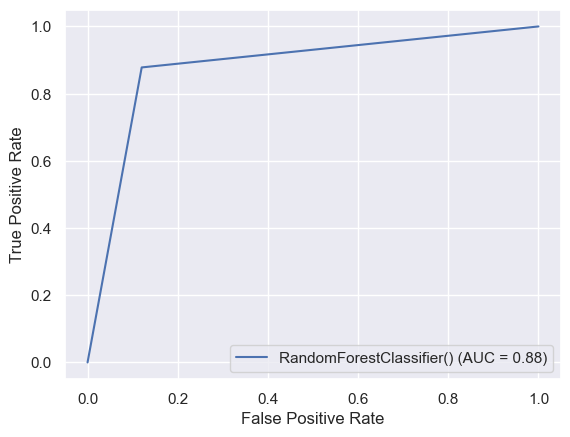

In [86]:
display.plot()

In [87]:
import joblib
joblib.dump(Final_model, "Income-prediction")

['Income-prediction']

In [88]:
model=joblib.load("Income-prediction")

In [89]:
model.fit(x_train,y_train)
prediction=model.predict(x_test)
prediction

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [90]:
a=np.array(y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['original']=a
df

,predicted,original
0,0,0
1,0,0
2,1,1
3,0,0
4,1,0
...,...,...
14827,0,0
14828,1,1
14829,1,1
14830,0,0
